In [446]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from copy import deepcopy as dc
from tqdm import tqdm
import time
import os

In [447]:
df = pd.read_csv('data/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Extracting records hour-wise

In [448]:
df = df[5::6]
df = df.reset_index(drop=True)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


Coverting the Date Time Column from 'string' to 'datetime'

In [449]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


Let's plot Date and Temperature Distribution

Text(0.5, 1.0, 'Temperature Distribution over a period of time in Jena, Germany')

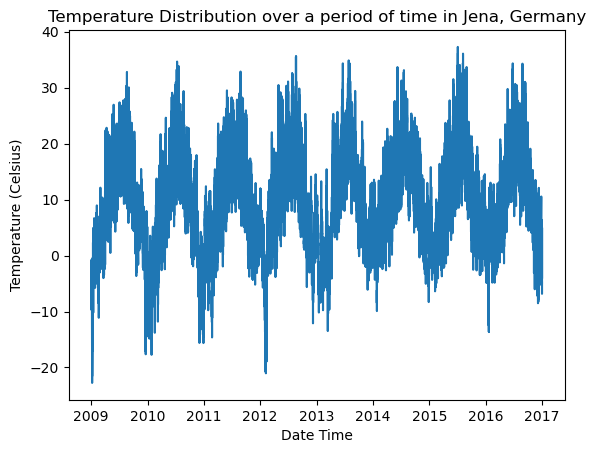

In [450]:
plt.plot(df['Date Time'], df['T (degC)'])
plt.xlabel('Date Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Distribution over a period of time in Jena, Germany')

Let's create a custom dataframe with only **Date Time** and **Temperature**

In [451]:
df.index = df['Date Time']
df_temperature = df.loc[:, ['T (degC)']]
df_temperature.head()

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63


Let's create another dataframe containing both **temperature** and **pressure**

In [452]:
df_temperature_pressure = df.loc[:, ['p (mbar)', 'T (degC)']]
df_temperature_pressure.head()

,p (mbar),T (degC)
Date Time,,
2009-01-01 01:00:00,996.50,-8.05
2009-01-01 02:00:00,996.62,-8.88
2009-01-01 03:00:00,996.84,-8.81
2009-01-01 04:00:00,996.99,-9.05
2009-01-01 05:00:00,997.46,-9.63


Let's create dataframe ready to be used by LSTM

In [453]:
def df_for_lstm(df, time_steps):
    col_name = df.columns[0]
    df = dc(df)
    
    for i in range(time_steps, 0, -1):
        df[f'{col_name} (t-{i})'] = df[col_name].shift(i)
        
    df.dropna(inplace=True)
    
    return df

In [454]:
df_lstm = df_for_lstm(df_temperature, time_steps=4 )
df_lstm.head()

,T (degC),T (degC) (t-4),T (degC) (t-3),T (degC) (t-2),T (degC) (t-1)
Date Time,,,,,
2009-01-01 05:00:00,-9.63,-8.05,-8.88,-8.81,-9.05
2009-01-01 06:00:00,-9.67,-8.88,-8.81,-9.05,-9.63
2009-01-01 07:00:00,-9.17,-8.81,-9.05,-9.63,-9.67
2009-01-01 08:00:00,-8.10,-9.05,-9.63,-9.67,-9.17
2009-01-01 09:00:00,-7.66,-9.63,-9.67,-9.17,-8.10


Let's do some normalization to our data

In [455]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_lstm)
normalized_data

array([[-2.26555485, -2.07777011, -2.17636168, -2.16810219, -2.19664653],
       [-2.27030407, -2.17630915, -2.168051  , -2.19659648, -2.26550899],
       [-2.2109389 , -2.16799863, -2.19654475, -2.26545769, -2.27025812],
       ...,
       [-1.44869018, -0.96890912, -1.17195677, -1.2384759 , -1.28837441],
       [-1.46531243, -1.17192329, -1.2384422 , -1.28834091, -1.44865772],
       [-1.58879197, -1.23840746, -1.28830628, -1.4486213 , -1.4652797 ]])

Let's convert our dataframe to labelled data for supervised based learning

In [456]:
X = normalized_data[:, 1:] # Last 4 columns
Y = normalized_data[:, 0]  # First column
X, Y = X.reshape(*X.shape, 1), Y.reshape(*Y.shape, 1) # Expanding dimension
X.shape, Y.shape
    

((70087, 4, 1), (70087, 1))

Let's visualize our input data and label

In [457]:
X[0], Y[0]

(array([[-2.07777011],
        [-2.17636168],
        [-2.16810219],
        [-2.19664653]]),
 array([-2.26555485]))

Let's create train, validation and test data

In [458]:
train_val_test_split = [math.floor(len(X)*0.8), math.floor(len(X)*0.9)]
train_X, train_Y = X[:train_val_test_split[0]], Y[:train_val_test_split[0]]
val_X, val_Y = X[train_val_test_split[0]:train_val_test_split[1]], Y[train_val_test_split[0]:train_val_test_split[1]]
test_X, test_Y = X[train_val_test_split[1]:], Y[train_val_test_split[1]:]

train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((56069, 4, 1), (56069, 1), (7009, 4, 1), (7009, 1), (7009, 4, 1), (7009, 1))

Lets do some import and convert numpy data to torch tensors

In [459]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [460]:

train_X_tensor = torch.Tensor(train_X)
val_X_tensor = torch.Tensor(val_X)
test_X_tensor = torch.Tensor(test_X)

train_Y_tensor = torch.Tensor(train_Y)
val_Y_tensor = torch.Tensor(val_Y)
test_Y_tensor = torch.Tensor(test_Y)

train_X_tensor.shape, train_Y_tensor.shape, val_X_tensor.shape, val_Y_tensor.shape, test_X_tensor.shape, test_Y_tensor.shape

(torch.Size([56069, 4, 1]),
 torch.Size([56069, 1]),
 torch.Size([7009, 4, 1]),
 torch.Size([7009, 1]),
 torch.Size([7009, 4, 1]),
 torch.Size([7009, 1]))

Let's create a custom Pytorch Dataset

In [461]:
class TemperatureDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]
    
train_dataset = TemperatureDataset(train_X_tensor, train_Y_tensor)
val_dataset = TemperatureDataset(val_X_tensor, val_Y_tensor)
test_dataset = TemperatureDataset(test_X_tensor, test_Y_tensor)

Let's create dataloader for these datasets

In [462]:
batch_size = 16
device = 'cuda' if torch.cuda.is_available() else 'cpu'

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Let's build a LSTM Model in Pytorch

In [463]:
# Define LSTM model
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        
        return out

Lets define some hyperparameters, loss function and optimizer

In [464]:
# Define model parameters
input_size = 1
hidden_size = 4
num_layers = 1
num_epochs = 30
learning_rate = 0.01

# Initialize model
model = LSTM(input_size, hidden_size, num_layers)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Lets define training and validation loop

In [ ]:
# initialize a dictionary to store training history
H = {"training_loss": [], "val_loss": [], "epochs": []}

# loop over epochs
print("[INFO] Training the network...")
start_time = time.time()

for epoch in tqdm(range(num_epochs)):
    training_loss = 0.0
    val_loss = 0.0
    
    model.train(True)
    for i, (inputs, targets) in enumerate(train_loader, 0):
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()
            
    avg_training_loss = round(training_loss / len(train_loader), 4)
    
    # update our training history
    H["training_loss"].append(avg_training_loss)
    H["epochs"].append(epoch + 1)
    
    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        val_accuracy = 0
        for i, (inputs, targets) in enumerate(val_loader, 0):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            
        avg_val_loss = round(val_loss / len(val_loader), 4)
            
    # update our validation history
    H["val_loss"].append(avg_val_loss)
    print(f'[Epoch {epoch + 1}] Training Loss: {avg_training_loss} Validation Loss: {avg_val_loss}')
print('Finished Training')

# display the total time needed to perform the training
end_time = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(end_time - start_time))


Let's plot the training and validation loss

In [ ]:
# plot the training loss
PLOT_PATH = "LSTM Model Training Curve with {} Epochs.jpg".format(num_epochs)
print("Plotting the training loss...")
plt.style.use("ggplot")
plt.figure()
plt.plot(H["epochs"], H["training_loss"], label="Training Loss")
plt.plot(H["epochs"], H["training_accuracy"], label="Training Accuracy")
plt.plot(H["epochs"], H["val_loss"], label="Validation Loss")
plt.plot(H["epochs"], H["val_accuracy"], label="Validation Accuracy")
plt.title("Training and Validation Loss/Accuracy")
plt.xlabel("Number of Epochs")
plt.xticks([i for i in range(0, num_epochs + 2, 4)])
plt.legend(loc="best")
plt.savefig(os.path.join('output', PLOT_PATH))

Let's do inference on Validation and Test Data

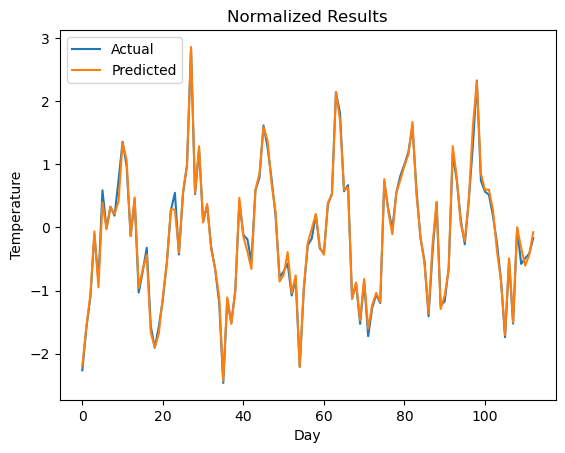

In [498]:
with torch.no_grad():
    predicted = model(train_X_tensor.to(device)).to('cpu').numpy()


plt.plot(train_Y[::500], label='Actual')
plt.plot(predicted[::500], label='Predicted')
plt.title("Normalized Results")
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()


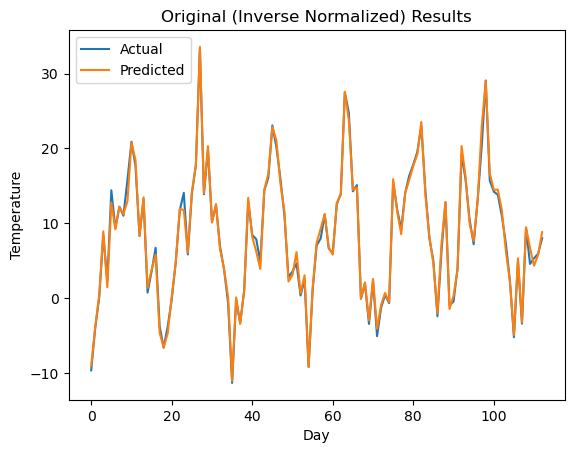

In [496]:
train_predictions = predicted.flatten()

dummies = np.zeros((train_X.shape[0], 5))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])

dummies = np.zeros((train_X.shape[0], 5))
dummies[:, 0] = train_Y.flatten()
dummies = scaler.inverse_transform(dummies)

train_Y_original = dc(dummies[:, 0])

plt.plot(train_Y_original[::500], label='Actual')
plt.plot(train_predictions[::500], label='Predicted')
plt.title("Original (Inverse Normalized) Results")
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()